# Topic 2.2: Logistic regression


This notebook combines theory with exercises to support the understanding of logistic regression in computer-aided diagnosis. Implement all functions in the `code` folder of your cloned repository, and test it in this notebook after implementation by importing your functions to this notebook. Use available markdown sections to fill in your answers to questions as you proceed through the notebook.

**Contents:** <br>

1. [Logistic regression (theory)](#logreg_theory)<br>
2. [Implementing the components of logistic regression](#logreg_components)<br>
3. [Implementing logistic regression](#logreg_implementation)<br>
4. [Generalization and overfitting](#generalization_overfitting)<br>

**References:**<br>

[1] Peng, Chao-Ying J. An Introduction to Logistic Regression Analysis and Reporting, The Journal of Educational Research (2002) [LINK](https://www.tandfonline.com/doi/abs/10.1080/00220670209598786)

In [1]:
%load_ext autoreload
%autoreload 2

<div id='logreg_theory'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div>

## 1. Logistic regression (theory)

The logistic regression classifier can be considered as an extension of linear regression. However, logistic regression predicts whether something is True or False instead of predicting a continuous variable like height, for instance. Instead of fitting a line to the data, logistic regression fits an "S"-shaped curve (the sigmoid function) ranging from $0$ to $1$:

<center width="100%"><img src="../reader/assets/logistic_regression.png" width="500"></center>

<font size="1"> Figure from [Logistic regression - detailed overview by Saishruthi Swaminathan](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)</font>

Logistic curve thus predicts the probability of an observation being classified into certain group. Logistic regression tests if a variable's effect on the prediction is significantly different from $0$. Its ability to provide probabilities and classify new samples using continuous and discrete measurements makes it a popular machine learning approach. Logistic regression does not have the same concept of residuals unlike linear regression, i.e. the least squares method cannot be applied and the correlation $R^{2}$ cannot be calculated. Instead, the concept of maximum likelihood is used. In medical applications, logistic regression serves for mortality prediction in injured patients or as a predictor of developing a certain disease.

<div id='logreg_components'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div>

## 2. Implementing the components of logistic regression

For a binary classification problem (a classification problem with two classes), logistic regression predicts the probability that a sample **x** belongs to one of the classes:

$$
p(y=1 | \mathbf{x})=\sigma\left(\boldsymbol{\theta}^{\top} \mathbf{x}\right)
$$

We can view this expression as passing the output from a linear regression model $\boldsymbol{\theta}^\intercal \mathbf{x}$ through the sigmoid function $\sigma(\cdot)$ that "squashes" the value between 0 and 1 making it possible to be interpreted as a probability.

The loss function for logistic regression is the negative log-likelihood (NLL):

$$
J(\theta)=-\sum_{i=1}^{N} y_{i} \log p\left(y=1 | \mathbf{x}_{i}, \theta\right)+\left(1-y_{i}\right) \log \left\{1-p\left(y=1 | \mathbf{x}_{i}, \theta\right)\right\}
$$

Compared to linear regression, there is no closed-form solution for the optimal parameters of the model (we cannot set the derivative of $J(\boldsymbol\theta)$ to zero and solve for $\boldsymbol\theta$). The NLL loss is optimised with the gradient descent method, similar to intensity-based image registration covered in the Registration topic of this course.

The provided `logistic_regression()` Python script in `SECTION 2` of the `cad_tests.py` module implements all necessary steps for training a logistic regression model on a toy dataset. However, the code will not work as is because two of the functions it depends on (`sigmoid()` and `lr_nll()`) are not implemented yet.


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>

### *Exercise 2.1*:
Implement the computation of the sigmoid function in `sigmoid()` in `SECTION 2` of the `cad.py` module. You will test your implementation in the next exercise.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>

### *Exercise 2.2*:
Implement the computation of the negative log-likelihood in `lr_nll` in `SECTION 2` of the `cad.py` module. You will test your implementation in the next exercise.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

### *Question 2.1*:
Suppose that you have two logistic regression models that predict $p(y=1 | \mathbf{x})$ and a validation dataset with three samples with labels 1, 0 and 1. The first model predicts the following probabilities for the three validation samples: 0.9, 0.4 and 0.7. The second model predicts 0.7. 0.5 and 0.9. Which of the two models has a better performance on the validation set? How did you come to this conclusion?

the best model is is the first one. you want p(y=1|x) to be as low as possible for label 0 and as high as possible for 1, and that model achieves that best and shall have the best performance of the validation set because it is closer to the truth of the labels. This is due to 0.1 difference at the 2nd prediction, it is 0.1 beter than the other model.

<div id='logreg_implementation'></div>

## 3. Implementing logistic regression

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>

### *Exercise 3.1*:

The provided `logistic_regression()` Python script implements all necessary steps for training a logistic regression model on a toy dataset. 

The first part of the script generates and visualizes a dataset for a binary classification problem. The code generates both a training and a validation dataset, which can be used to monitor for overfitting  during the training process. The second part implements training of logistic regression with stochastic gradient descent. The training process is visualized in two ways: a scatter plot of the training data along with the linear decision boundary, and a plot of the training and validation loss as a function of the number of iterations (this is similar to the plot of the similarity vs. the number of iteration for intensity-baser image registration).

Read through the code and comments and make sure you understand what it does (you can skip the visualization part as it is not relevant for understanding logistic regression and stochastic gradient descent).

If you have implemented `sigmoid()` and `lr_nll()` correctly and run `logistic_regression()`, the results should look like on the figure below (it will most likely not be exactly the same as the toy dataset is randomly generated). 

<center width="100%"><img src="../reader/assets/logreg_training.png" ></center>



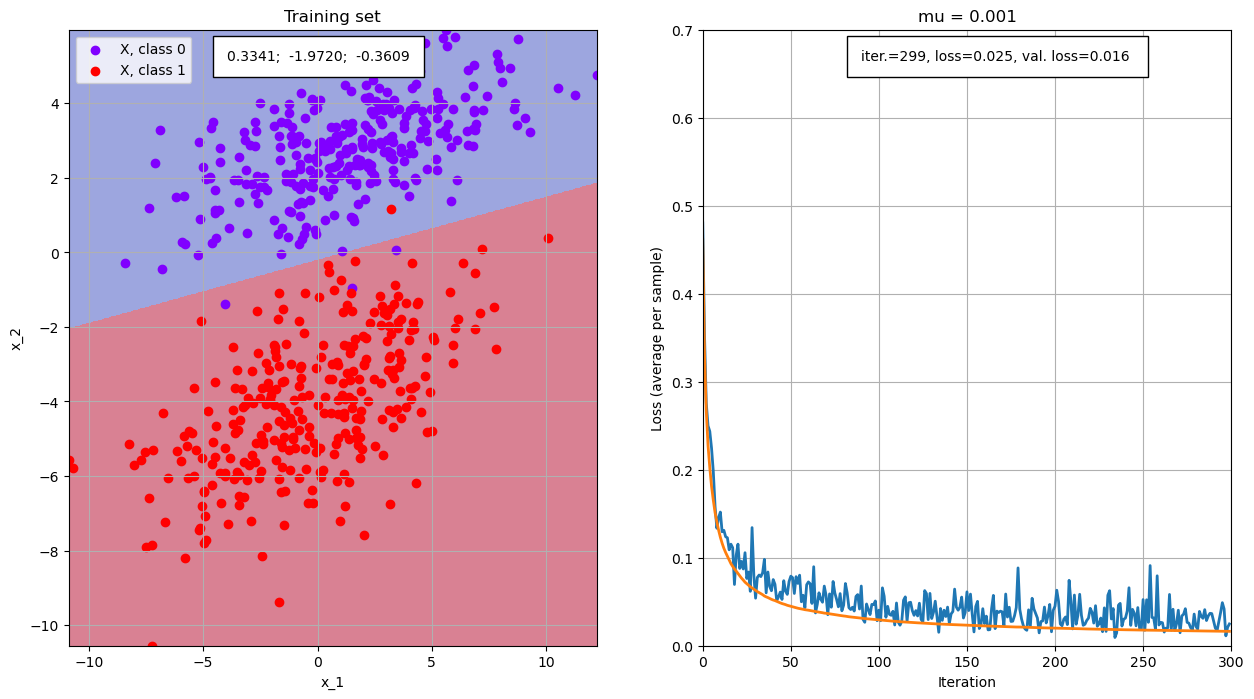

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from IPython.display import display, clear_output, HTML
from cad_tests import logistic_regression

logistic_regression()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

### *Question 3.1*:
What is the difference between "regular" gradient descent and stochastic gradient descent? What is the advantage of one over the other?

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

### *Question 3.2*:
In the figure above, the training loss curve has a noisy appearance, whereas the validation loss curve is relatively smooth. Why is this the case (**Tip**: How will the appearance of the training loss curve change if you increase the batch size parameter?).

regular gradient descent uses all training samples, while stochastic chooses randomly in the training set to get good diversity and not use too much training samples such that training takes too long.

Because with a larger batch size of the validation set. with a larger batch, the error will differ less than in small batches. because the validation set is standardly 200 and does not change in the images that are tested it makes the deviation less abrupt and has a less noisy feel to it.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

### *Question 3.3*:
Based on the training curves in the figure above, would you say that the model has overfitted the training dataset? Motivate your answer.

because the validation does not go up i do not think that the data is overfitted. As long as the validation result does not become worse the model is not overfitting because the validation is there to test for generalization and overfitting. This is done by checking each iteration if independent data is still predicted well by the model. As long as the validation descends, it means that the model is improving and is actually not overfitting on the training data.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

### *Question 3.4*:
Assuming that you have trained a model and are satisfied with the generalization performance, how can you use the model to predict the class label $y$ for an unknown test sample $\mathbf{x}$. (**Tip**: Remember that the model predicts a probability. How can this probability be converted to a binary class label?).

this can be converted to a label by the sigmoid function which squashes the prediction into 2 classes and therefore give a prediction for an unknown test sample.

<div id='generalization_overfitting'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div>

## 4. Generalization and overfitting

Generalization and overfitting are crucial terms in machine learning algorithms. Generalization describes a model's ability to make accurate predictions based on new data previously absent from the training dataset. Model's generalization capability can be thought of as a success measure in making accurate predictions. However, if a model has been trained too well on training data, it will make inaccurate predictions on new data. The opposite holds as well. Underfitting can happen when a model has been trained insufficiently.

In practice, three datasets are used in deep learning research:

1. **Training set** - The training set is used for training the model (i.e. iteratively updating the network weights to minimize the error).
2. **Validation set** - At the inference phase, the validation set is used for two purposes: 

    - Check for model overfitting: Sometimes the model is able to 'remember' all the training examples, which means that the model will not generalize well to unseen data at the inference phase. Overfitting can be detected by inspecting the training and validation loss over time. The loss function is often based on the error between the model prediction and the desired output, this means that you want to minimize the loss function. As you can see in the figure below, the training and validation loss show the same pattern when the model is not overfitting (left figure). When the model is overfitting to the training data, you see that the training and validation loss start to diverge after a certain number of epochs (right figure), this tells you that the model is not generalizing well to new data.
    <center width="100%"><img src="../reader/assets/00_overfitting.jpg" width="880"></center>

    - Tuning of model parameters: Many parameters (e.g. number of layers, loss function, learning rate, etc.) influence the performance of the model for a specific task. The performance can often be measured with a quantitative metric because the desired output (ground truth) is known for the validation set. By systematically adapting model parameters and evaluating the performance, the optimal parameters can be chosen.
        
        
3. **Test set** - The test set is used to show the final performance of the model on an unseen set. This performance can give an indication of how the model will perform when it is implemented in for example the clinic (with the assumption that the test set resembles the real clinical data in terms of population and acquisition protocol).